5636.292774108878
[63.6460647  58.07334268 54.80519191 52.48426433]
[641.25776927 641.25776927 641.25776927 641.25776927]
[1.34837809e-02 1.93466900e-01 1.72625732e+00 1.48554742e+01]


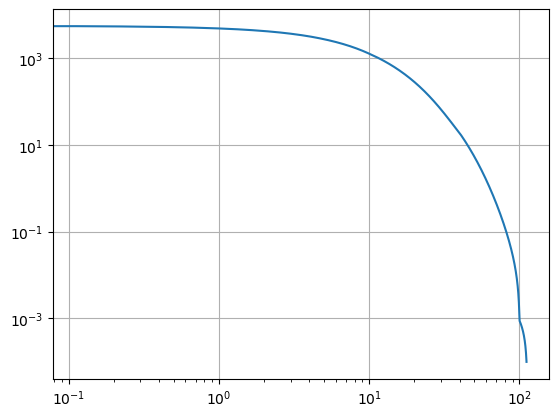

In [1]:
from xdepth_conversion import XdepthConversion
import matplotlib.pyplot as plt
import numpy as np


theta = 80
xconv = XdepthConversion(theta)
xconv.set_length_unit("km")

height = np.linspace(0, xconv.get_max_height(), 1000, dtype='float64')
length = height/np.cos(80 * np.pi/180)
xdepth_fun = np.frompyfunc(lambda x : np.float64(xconv.convert_h2x(x)), 1, 1)
xdepth = xdepth_fun(height).astype('float64') 
plt.loglog(height, xdepth)
plt.grid()
print(xconv.convert_h2x(0))

# np.interp(np.array([1, 2, 3],dtype='float64'), height, xdepth)
print(np.interp(np.array([1, 2, 3, 4],dtype='float64'), xdepth[::-1], height[::-1]))
print(np.interp(np.array([0, 0, 0, 0],dtype='float64'), xdepth[::-1], length[::-1]))

llen = np.interp(np.array([0, 0, 0, 0],dtype='float64'), xdepth[::-1], length[::-1])
dlen = np.array([100, 200, 300, 400], dtype = np.float64)
print(np.interp(llen - dlen, length,  xdepth))
# print(llen - dlen)

# xdepth
# np.array([1, 2, 3],dtype='float64')


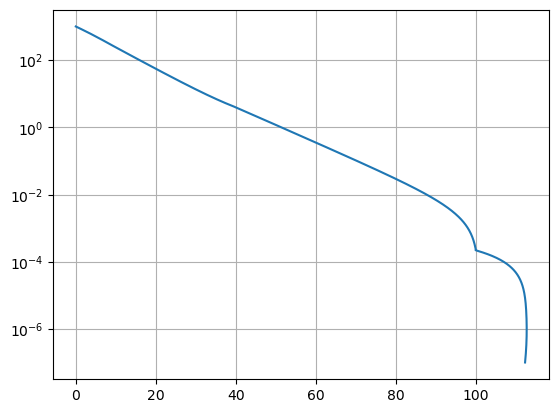

In [25]:
xdepth = np.geomspace(1e-7, xconv.get_max_xdepth(), 1000)
hf_fun = np.frompyfunc(xconv.convert_x2h, 1, 1)
plt.semilogy(hf_fun(xdepth), xdepth)
plt.grid()